# Ejemplo en pagina https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Viernes 8 Octubre 2021 17:43:11 

@author: Daniel Busso
"""

# Plantilla de Pre Procesado

# Cómo importar las librerías
import numpy    as np
import pandas   as pd
import datetime as dt
import os

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


### Método de desviación estándar

In [3]:
 ...
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [4]:
...
# identify outliers
outliers = [x for x in data if x < lower or x > upper]

In [5]:
outliers

[65.15428556186015,
 69.79301352018982,
 66.60539378085183,
 34.73117809786848,
 34.23321274904475,
 34.91984007395351,
 67.1633171589778,
 34.679293219474495,
 68.70124451852294,
 65.67523670043954,
 66.19171598376188,
 33.73482882511691,
 65.66014864070253,
 65.06377284118616,
 34.0469182658796,
 33.6969245211173,
 67.02151137874486,
 65.59239795391275,
 66.49270261640393,
 65.74492012609815,
 33.525707966507426,
 34.72183379792847,
 70.1342452227369,
 33.90433947188079,
 65.55945915508362,
 68.06638503541573,
 66.99057828251213,
 67.80436660352774,
 31.717799503726024]

In [6]:
len(outliers)

29

In [7]:
type(data)

numpy.ndarray

In [8]:
data

array([58.12172682, 46.94121793, 47.35914124, ..., 44.92928092,
       49.68651887, 42.81065054])

In [9]:
...
# remove outliers
outliers_removed = [x for x in data if x > lower and x < upper]

In [10]:
len(outliers_removed)

9971

In [11]:
data.shape

(10000,)

### Método de rango intercuartílico

In [12]:
...
# calculate interquartile range
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25

In [13]:
q75

53.35904417735179

In [14]:
iqr

6.673668386862346

In [15]:
...
# calculate the outlier cutoff
bigote = iqr * 1.5
lower, upper = q25 - bigote, q75 + bigote

In [16]:
lower

36.674873210195926

In [17]:
upper

63.36954675764531

In [18]:
...
# identify outliers
outliers = [x for x in data if x < lower or x > upper]

In [19]:
...
# remove outliers
outliers_removed = [x for x in data if x > lower and x < upper]

In [20]:
len(outliers)

81

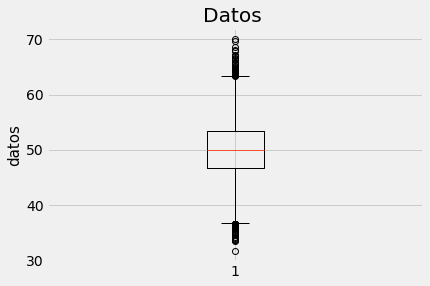

In [21]:
#plt.boxplot(Trafos['TD1_MVA', 'TD2_MVA', 'TD3_MVA', 'Suma'])

#data = Gene[['TG1_MVA', 'TG2_MVA', 'Suma']]
fig1, ax1 = plt.subplots()
ax1.set_title('Datos ')
ax1.set_ylabel("datos", fontsize=15)  # Add a y-label to the axes.
ax1.boxplot(data)

plt.show()

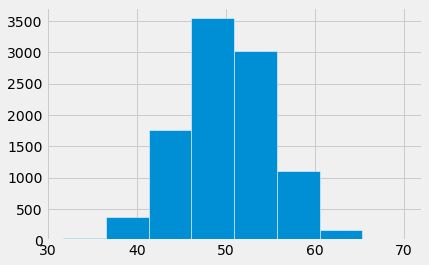

In [22]:
# plot:
fig, ax = plt.subplots()

ax.hist(data, bins=8, linewidth=0.5, edgecolor="white")

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
 #      ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()



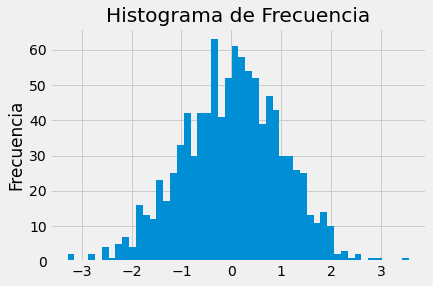

In [23]:
x = np.random.normal(size=1000), 
plt.hist(x, bins=50)
plt.gca().set(title='Histograma de Frecuencia', ylabel='Frecuencia');

## https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

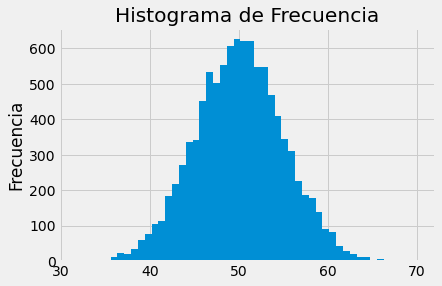

In [24]:
x = np.random.normal(size=1000), 
plt.hist(data, bins=50)
plt.gca().set(title='Histograma de Frecuencia', ylabel='Frecuencia');

In [25]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])


In [26]:
s1

0    a
1    b
dtype: object

In [27]:
s2

0    c
1    d
dtype: object

In [28]:
con = pd.concat([s1, s2], ignore_index=True)

In [29]:
con

0    a
1    b
2    c
3    d
dtype: object

In [30]:
c = pd.concat([s1, s2], axis=1)

In [31]:
c

,0,1
0,a,c
1,b,d
